In [1]:
import numpy as np
from skimage import graph
import matplotlib.pyplot as plt
import rasterio
import neilpy

In [2]:
with rasterio.open('../sample_data/sample_dem.tif') as src:
    Z = src.read(1)
    Zt = src.affine
    cellsize = Zt[0]
    
S = neilpy.slope(Z,cellsize)

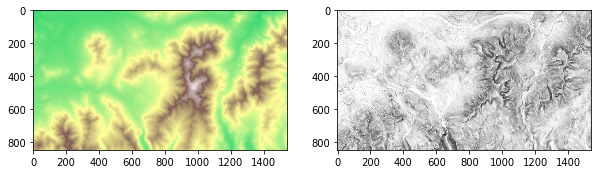

In [3]:
# Show a hysometric tint and slope raster
plt.figure(figsize=(10,7))
plt.subplot(121)
plt.imshow(Z,cmap='terrain',vmin=-500,vmax=2000)
plt.subplot(122)
plt.imshow(S,cmap='gray_r')
plt.show()

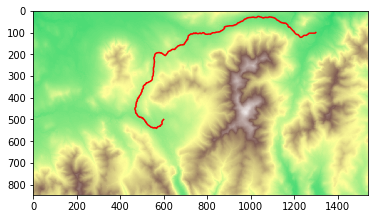

In [4]:
# Plot a route through the array, given start and ending pixels
# This will try to find a route that avoids cells with steep slope values

route, cost = graph.route_through_array(S,start=(500,600),end=(100,1300))
route = np.array(route)
plt.imshow(Z,cmap='terrain',vmin=-500,vmax=2000)
plt.plot(route[:,1],route[:,0],'r-')
plt.show()

# A Peruvian Example

<a href="https://muse.jhu.edu/book/41407" target="_blank">Rademaker et al. (2012)</a> presented some work outlining a LCP analysis between several settlements in Peru using a metabolic calculation.  This work can be implemented in Python in the following way, with one path between Quebrada Jaguay and Condorsayana as an example.

In [5]:
with rasterio.open('../../neilpy_data/peru.tif') as src:
    Z = src.read(1)
    Zt = src.affine
cellsize = Zt[0]
zf = neilpy.z_factor(Zt[5])

# Reference map from Rademaker et al. (2012):
im = plt.imread('../../neilpy_data/Rademaker_LCA_energy_formula_map.png')

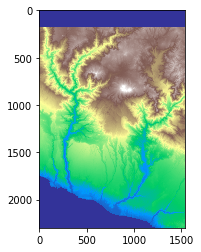

In [6]:
plt.imshow(Z,cmap='terrain',vmin=-500,vmax=6000)
plt.show()

In [7]:
# Define a GRADE raster, and set any nodata values to infinity
G = 100 * neilpy.slope(Z,cellsize,z_factor=zf,return_as='percent')
G[Z==src.nodata] = np.inf

In [8]:
# Definte model parameters
W = 50     # Weight of traveler, in kg
L = 0      # Weight of pack, in kg
tc = 1.1   # Terrain coefficient, 1 is flat and greater values introduce "friction"
V = 1.2    # Walking speed, in meters per second

# Cost, in MWatts
MW = 1.5*W + 2.0 * (W + L) * ((L/W)**2) + tc * (W+L) * (1.5 * V**2 + .35 * V * G)

In [9]:
start =  (-72.872,-16.509)
end = (-72.708,-15.123)

# Convert to pixel coordinates
start = np.round(~Zt * start).astype(int)[::-1]
end = np.round(~Zt * end).astype(int)[::-1]

# Find route
route, cost = graph.route_through_array(MW,start,end)
route = np.array(route)

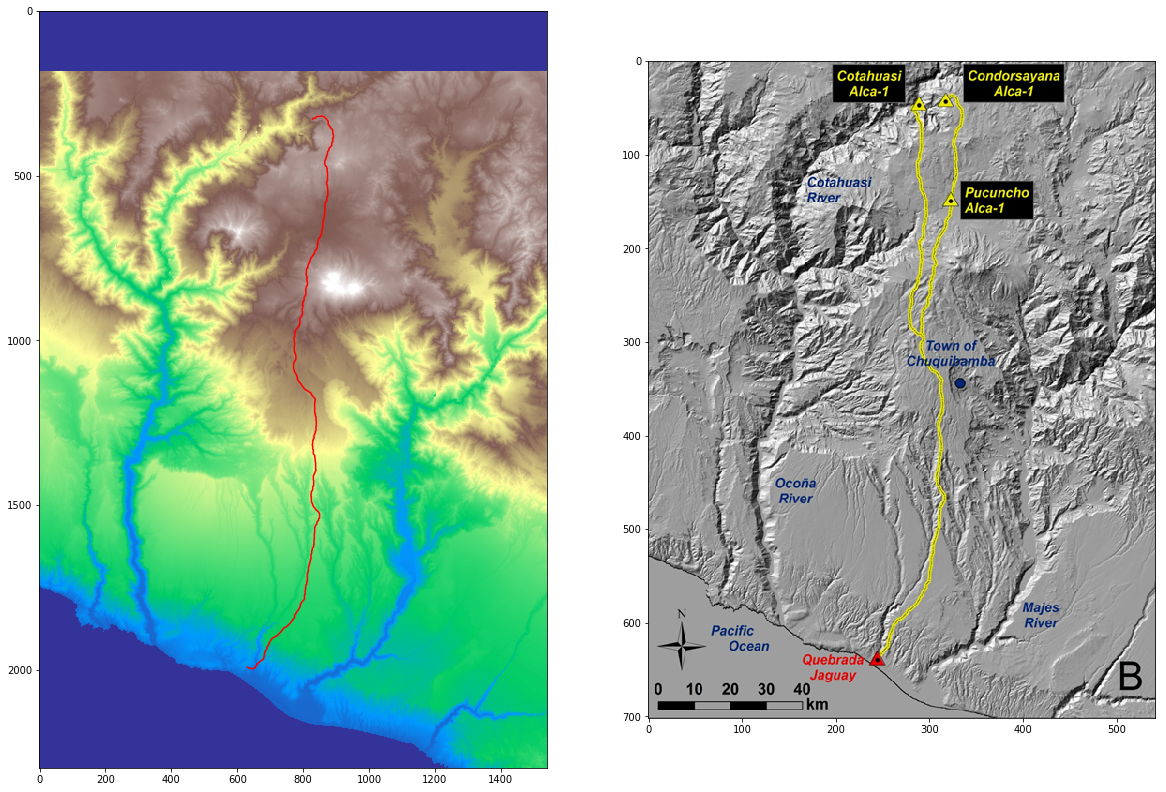

In [10]:
plt.figure(figsize=(20,20))
plt.subplot(121)
plt.imshow(Z,cmap='terrain',vmin=-500,vmax=6000)
plt.plot(route[:,1],route[:,0],'r-')
plt.subplot(122)
plt.imshow(im)
plt.show()